In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mrwellsdavid/unsw-nb15")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'unsw-nb15' dataset.
Path to dataset files: /kaggle/input/unsw-nb15


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.callbacks import EarlyStopping


In [7]:
df = pd.read_csv(path+"/UNSW_NB15_training-set.csv")
df.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,udp,-,INT,2,0,496,0,90909.0902,...,1,2,0,0,0,1,2,0,Normal,0
1,2,0.000008,udp,-,INT,2,0,1762,0,125000.0003,...,1,2,0,0,0,1,2,0,Normal,0
2,3,0.000005,udp,-,INT,2,0,1068,0,200000.0051,...,1,3,0,0,0,1,3,0,Normal,0
3,4,0.000006,udp,-,INT,2,0,900,0,166666.6608,...,1,3,0,0,0,2,3,0,Normal,0
4,5,0.000010,udp,-,INT,2,0,2126,0,100000.0025,...,1,3,0,0,0,2,3,0,Normal,0


In [8]:
df['label'].value_counts()


,count
label,
1,45332
0,37000


In [9]:
df_numeric = df.select_dtypes(include=[np.number])

normal = df_numeric[df_numeric['label'] == 0].drop(columns=['label'])
attack = df_numeric[df_numeric['label'] == 1].drop(columns=['label'])


In [10]:
scaler = MinMaxScaler()
normal_scaled = scaler.fit_transform(normal)
attack_scaled = scaler.transform(attack)


In [11]:
input_dim = normal_scaled.shape[1]

input_layer = Input(shape=(input_dim,))
encoded = Dense(64, activation='relu')(input_layer)
encoded = Dense(32, activation='relu')(encoded)

decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(input_dim, activation='sigmoid')(decoded)

autoencoder = Model(input_layer, decoded)
autoencoder.compile(optimizer='adam', loss='mse')

autoencoder.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 40)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         2,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 40)             │         2,600 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,416 (36.78 KB)

 Trainable params: 9,416 (36.78 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
early_stop = EarlyStopping(monitor='loss', patience=3)

autoencoder.fit(
    normal_scaled,
    normal_scaled,
    epochs=30,
    batch_size=256,
    shuffle=True,
    callbacks=[early_stop]
)


Epoch 1/30
145/145 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 0.1117
Epoch 2/30
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0145
Epoch 3/30
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0093
Epoch 4/30
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0076
Epoch 5/30
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0069
Epoch 6/30
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0053
Epoch 7/30
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0025
Epoch 8/30
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0020
Epoch 9/30
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0017
Epoch 10/30
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0016
Epoch 11/30
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0015
Epoch 12/30
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0014
Epoch 13/30
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0012
Epoch 14/30
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0011
Epoch 15/30
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - lo

In [13]:
normal_recon = autoencoder.predict(normal_scaled)
attack_recon = autoencoder.predict(attack_scaled)

normal_error = np.mean(np.square(normal_scaled - normal_recon), axis=1)
attack_error = np.mean(np.square(attack_scaled - attack_recon), axis=1)


1157/1157 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
1417/1417 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


In [14]:
threshold = np.percentile(normal_error, 95)
print("Anomaly Threshold:", threshold)


Anomaly Threshold: 0.0007518302690019071


In [15]:
y_true = np.concatenate([
    np.zeros(len(normal_error)),
    np.ones(len(attack_error))
])

y_pred = np.concatenate([
    normal_error > threshold,
    attack_error > threshold
])


In [16]:
print(confusion_matrix(y_true, y_pred))
print(classification_report(y_true, y_pred))


[[35150  1850]
 [22868 22464]]
              precision    recall  f1-score   support

         0.0       0.61      0.95      0.74     37000
         1.0       0.92      0.50      0.65     45332

    accuracy                           0.70     82332
   macro avg       0.76      0.72      0.69     82332
weighted avg       0.78      0.70      0.69     82332



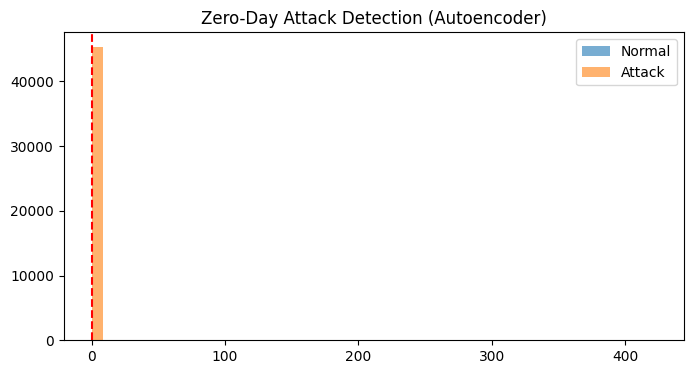

In [17]:
plt.figure(figsize=(8,4))
plt.hist(normal_error, bins=50, alpha=0.6, label="Normal")
plt.hist(attack_error, bins=50, alpha=0.6, label="Attack")
plt.axvline(threshold, color='red', linestyle='--')
plt.legend()
plt.title("Zero-Day Attack Detection (Autoencoder)")
plt.show()


In [20]:
history = autoencoder.fit(
    normal_scaled,
    normal_scaled,
    epochs=10,
    batch_size=256,
    shuffle=True
)


Epoch 1/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 3.6472e-04
Epoch 2/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 3.4752e-04
Epoch 3/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 3.4421e-04
Epoch 4/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 3.4959e-04
Epoch 5/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.5076e-04
Epoch 6/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.3757e-04
Epoch 7/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.2812e-04
Epoch 8/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.2996e-04
Epoch 9/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.3209e-04
Epoch 10/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.2047e-04


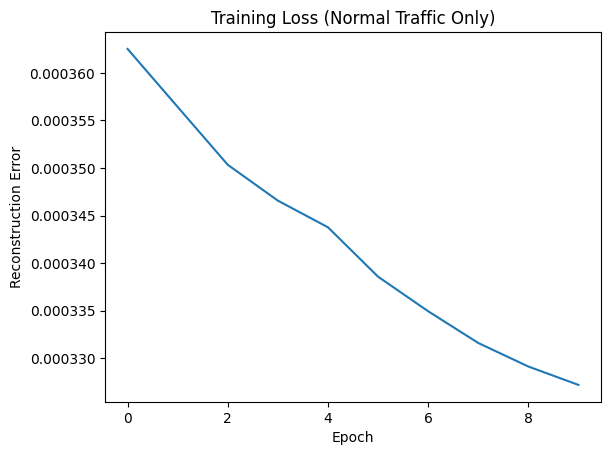

In [21]:
plt.plot(history.history['loss'])
plt.title("Training Loss (Normal Traffic Only)")
plt.xlabel("Epoch")
plt.ylabel("Reconstruction Error")
plt.show()


In [22]:
sample_normal = normal_scaled[0].reshape(1, -1)
recon_normal = autoencoder.predict(sample_normal)
error_normal = np.mean((sample_normal - recon_normal)**2)

print("Normal Sample Error:", error_normal)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 424ms/step
Normal Sample Error: 0.00012758547688160885


In [23]:
sample_attack = attack_scaled[0].reshape(1, -1)
recon_attack = autoencoder.predict(sample_attack)
error_attack = np.mean((sample_attack - recon_attack)**2)

print("Attack Sample Error:", error_attack)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
Attack Sample Error: 0.0002735970422152463


In [24]:
print("Anomaly Threshold:", threshold)

print("Normal is anomaly?", error_normal > threshold)
print("Attack is anomaly?", error_attack > threshold)


Anomaly Threshold: 0.0007518302690019071
Normal is anomaly? False
Attack is anomaly? False


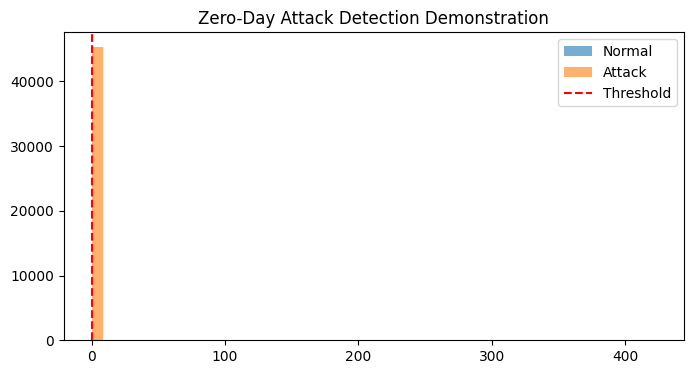

In [25]:
plt.figure(figsize=(8,4))
plt.hist(normal_error, bins=50, alpha=0.6, label="Normal")
plt.hist(attack_error, bins=50, alpha=0.6, label="Attack")
plt.axvline(threshold, color='red', linestyle='--', label="Threshold")
plt.legend()
plt.title("Zero-Day Attack Detection Demonstration")
plt.show()


In [26]:
print("Zero-Day Detection Accuracy:", np.mean(y_true == y_pred))


Zero-Day Detection Accuracy: 0.6997765145994267
